# NLTK工具包

In [14]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## 分词

In [15]:
# 加载英文分词器
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [16]:
input_str = "Today's weather is good, very windy and sunny. We have no classes in the afternoon. We are going to play basketball tomorrow."

In [17]:
tokens = word_tokenize(input_str)

In [19]:
tokens = [word.lower() for word in tokens]
tokens[:5]

['today', "'s", 'weather', 'is', 'good']

## Text对象
`help(nltk.text)`

In [20]:
t = Text(tokens) #转换为Text对象

In [21]:
t.count('good') #数频率

1

In [22]:
t.index('good') 

4

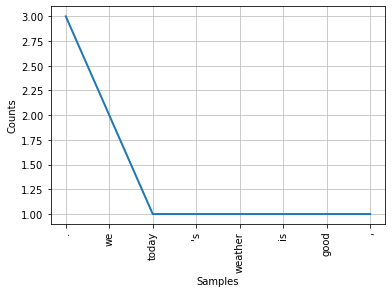

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
t.plot(8) #展示出现最多的前8个词

## 停用词 stopwords 过滤

In [24]:
from nltk.corpus import stopwords
stopwords.readme()

'Stopwords Corpus\n\nThis corpus contains lists of stop words for several languages.  These\nare high-frequency grammatical words which are usually ignored in text\nretrieval applications.\n\nThey were obtained from:\nhttp://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/\n\nThe stop words for the Romanian language were obtained from:\nhttp://arlc.ro/resources/\n\nThe English list has been augmented\nhttps://github.com/nltk/nltk_data/issues/22\n\nThe German list has been corrected\nhttps://github.com/nltk/nltk_data/pull/49\n\nA Kazakh list has been added\nhttps://github.com/nltk/nltk_data/pull/52\n\nA Nepali list has been added\nhttps://github.com/nltk/nltk_data/pull/83\n\nAn Azerbaijani list has been added\nhttps://github.com/nltk/nltk_data/pull/100\n\nA Greek list has been added\nhttps://github.com/nltk/nltk_data/pull/103\n\nAn Indonesian list has been added\nhttps://github.com/nltk/nltk_data/pull/112\n'

In [25]:
stopwords.fileids() #查看支持的语言

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [28]:
stopwords.raw('english').replace('\n',', ') #查看英文词表

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [29]:
test_words = [word.lower() for word in tokens]
test_words_set = set(test_words)

In [31]:
test_words_set.intersection(set(stopwords.words('english'))) #选出我们语句中的词语，和停用词表的交集。ie选出停用词

{'and', 'are', 'have', 'in', 'is', 'no', 'the', 'to', 'very', 'we'}

In [32]:
[w for w in test_words_set if(w not in stopwords.words('english'))]

['weather',
 'classes',
 'basketball',
 'windy',
 'going',
 "'s",
 'tomorrow',
 'today',
 '.',
 'play',
 ',',
 'afternoon',
 'sunny',
 'good']

## 词性标注

In [36]:
from nltk import pos_tag
tags = pos_tag(tokens)
tags

[('today', 'NN'),
 ("'s", 'POS'),
 ('weather', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 (',', ','),
 ('very', 'RB'),
 ('windy', 'JJ'),
 ('and', 'CC'),
 ('sunny', 'JJ'),
 ('.', '.'),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('no', 'DT'),
 ('classes', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('afternoon', 'NN'),
 ('.', '.'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('play', 'VB'),
 ('basketball', 'NN'),
 ('tomorrow', 'NN'),
 ('.', '.')]

## 分块
提出某个特定词性的词

In [37]:
from nltk.chunk import RegexpParser

In [38]:
sentence = [('the','DT'), ('little','JJ'), ('yellow','JJ'),('dog','NN'),('died','VBD')]
grammer = "MY_NP: {<DT>?<JJ>*<NN>}" #和正则差不多
cp = nltk.RegexpParser(grammer) #生成规则
result = cp.parse(sentence) #进行分块
print(result)

(S (MY_NP the/DT little/JJ yellow/JJ dog/NN) died/VBD)


In [39]:
result.draw()